<a href="https://colab.research.google.com/github/enjoyPG/SelfMachinelearning/blob/main/%ED%98%BC%EA%B3%B5_%EC%B1%95%ED%84%B03_2(%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## k-최근접 이웃의 한계

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


In [ ]:
import matplotlib.pyplot as plt

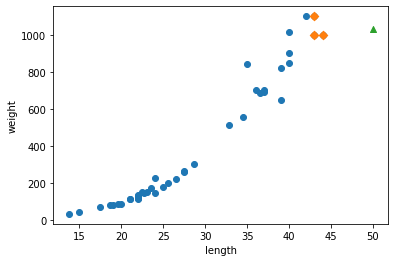

In [ ]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#몸무게를 1,033g으로 근사함
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
print(knr.predict([[100]]))

[1033.33333333]


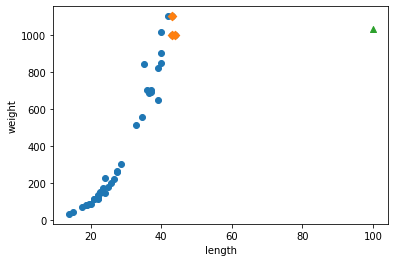

In [ ]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#100cm 농어도 1,033g 으로 무게를 근사함... K-최근접 이웃의 한계
#새로운 방법이 필요하다..

## 선형 회귀
### 머신 러닝의 가장 큰 목적은 실제 데이터를 바탕으로 모델을 생성해서 만약 다른 입력 값을 넣었을 때 발생할 아웃풋을 **예측**하는 데에 있다.

### 이때 우리가 찾아낼 수 있는 가장 직관적이고 간단한 모델은 선(line)이다. 그래서 **데이터를 놓고 그걸 가장 잘 설명할 수 있는 선을 찾는 분석하는 방법을 선형 회귀(Linear Regression) 분석**이라 부른다.

### 아래 그래프에서 검정색 점이 데이터이다. 이 데이터를 가장 잘 표현하는 선이 파란색 직선이며, 이는 **일차 함수(y=ax+b)** 형태로 나타난다.
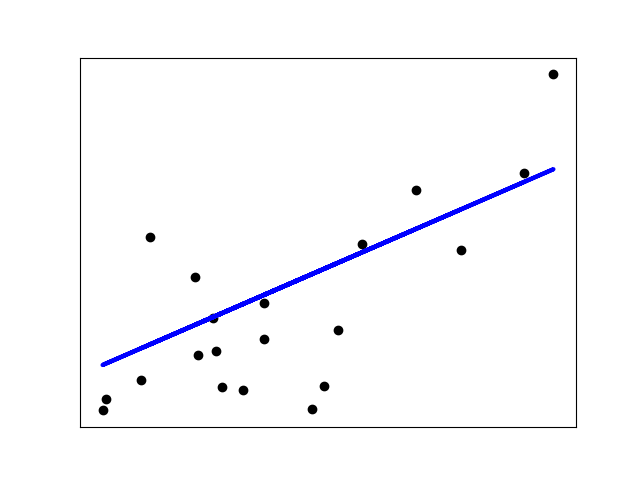

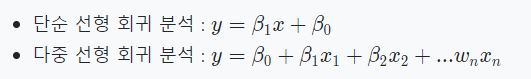


## 선형회귀 모델 평가
###결정계수, MSE, MAE등을 이용해서 cost(loss)를 계산하여 최선의 직선을 찾는다.
###이렇게 최선의 직선을 찾는 과정이 학습의 과정이며 Gradient Descent알고리즘이 사용된다.

##**경사 하강법(gradient descent) - 최적화 기법**
###- 함수 값이 낮아지는 방향으로 독립 변수 값을 변형시켜가면서 최종적으로는 최소 함수 값을 갖도록 하는 독립 변수 값을 찾는 방법
###- 경사하강법은 함수의 기울기(=gradient)를 이용해서 함수의 최소값 일 때의 x값을 찾기 위한 방법
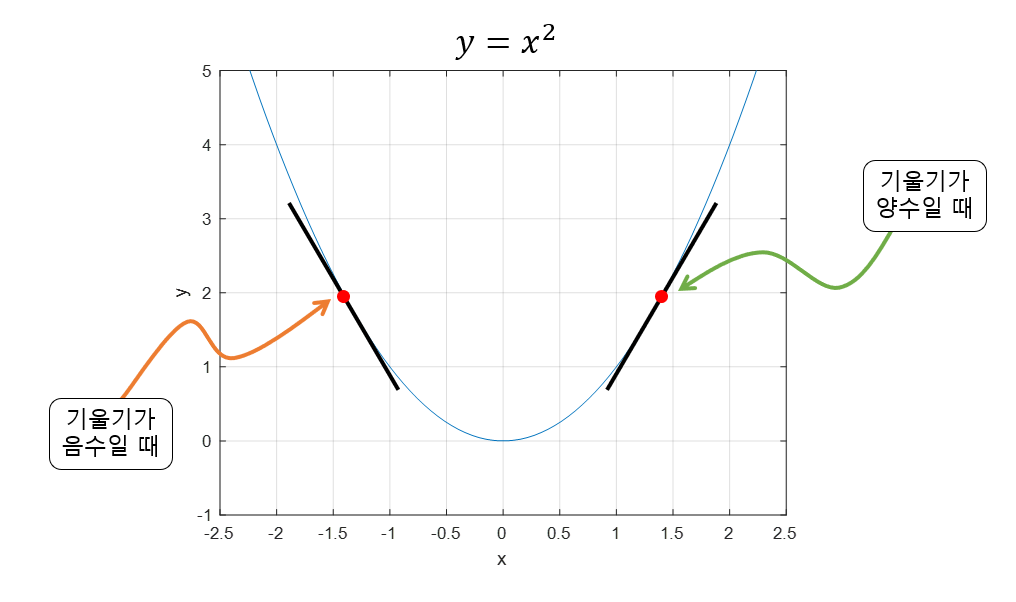

###**학습의 과정**
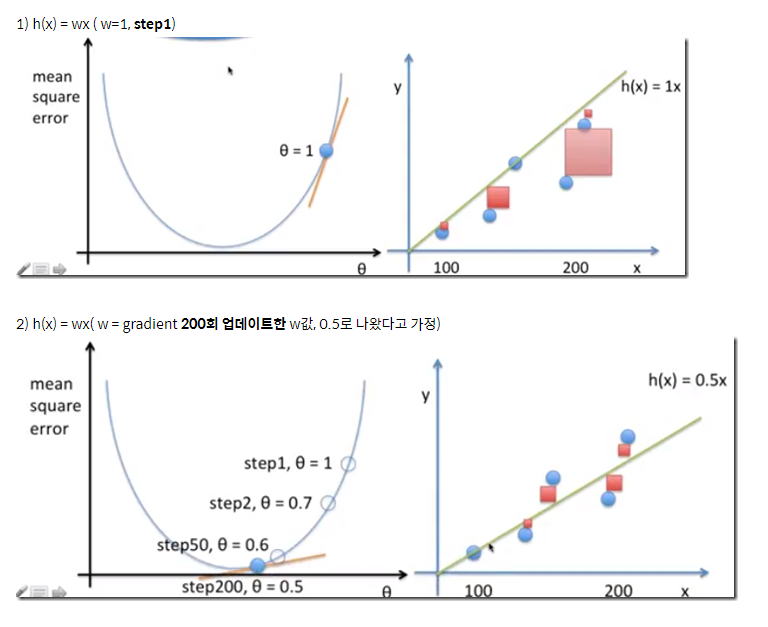

###**Step size(alpha, 학습률)**
####Step size가 큰 경우 이동 거리가 커지므로 빠르게 수렴할 수 있다는 장점이 있지만, 최소값으로 수렴되지 못 하고 함수값이 발산할 여지가 있다. 한편, step size가 너무 작으면 발산하지는 않겠지만, 최소값을 찾는데 너무 오래 걸릴 여지가 있다.

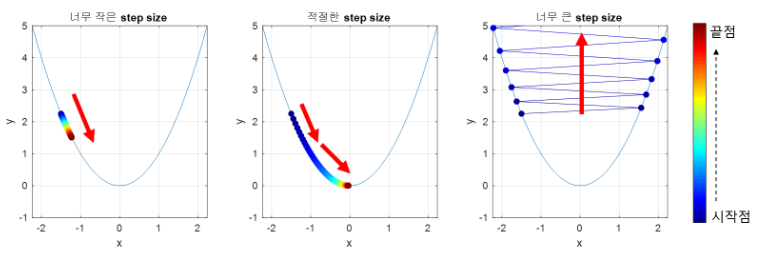

###**Local Minima 문제**
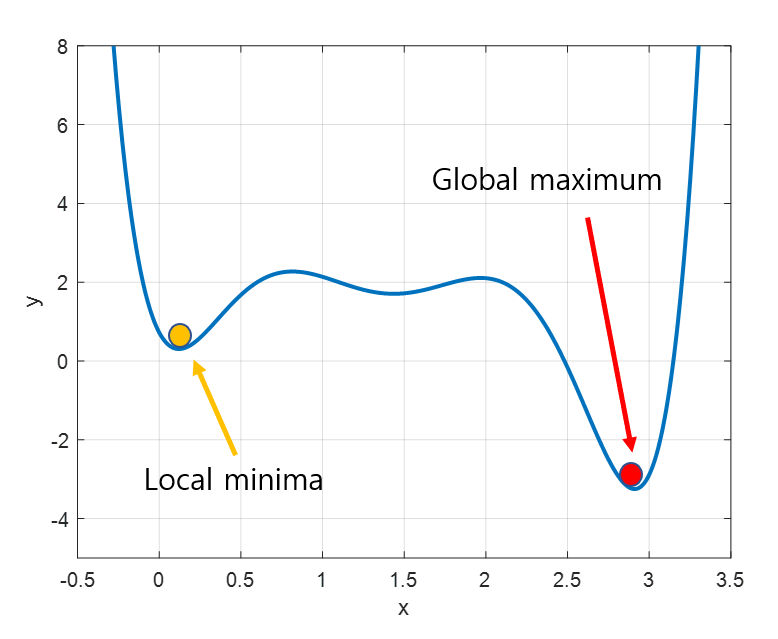


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))
#무게가 길이에 비례해서 증가한 모습을 알 수 잇음

[1241.83860323]


In [ ]:
#학습결과인 가중치(weight)와 편향(bias)은 각각 coef_, intercept_에 저장되어 있다.
#즉, y = 39.01x -709.01임을 알 수 있다.
# 1241 = 39.01 X 50 - 709.01
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


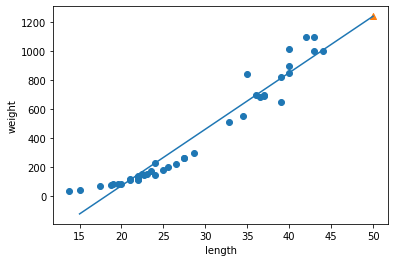

In [ ]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


## 다항 회귀

In [ ]:
#위 방정식의 그래프가 데이터를 잘 대표하고 있나요?
#더 잘 표현하도록 그래프를 그리려면?
#항을 추가해서 살펴보자. (길이, bias) -> (길이^2, 길이, bias) // 항이 길이 하나에서 길이^2와 길이로 늘어남(다항)
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


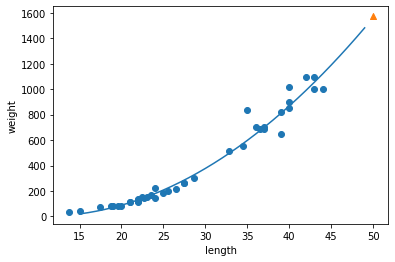

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
